# Display single image 

257 891 1049 1791
993 1855 1652 2531
1426 1401 1815 1874


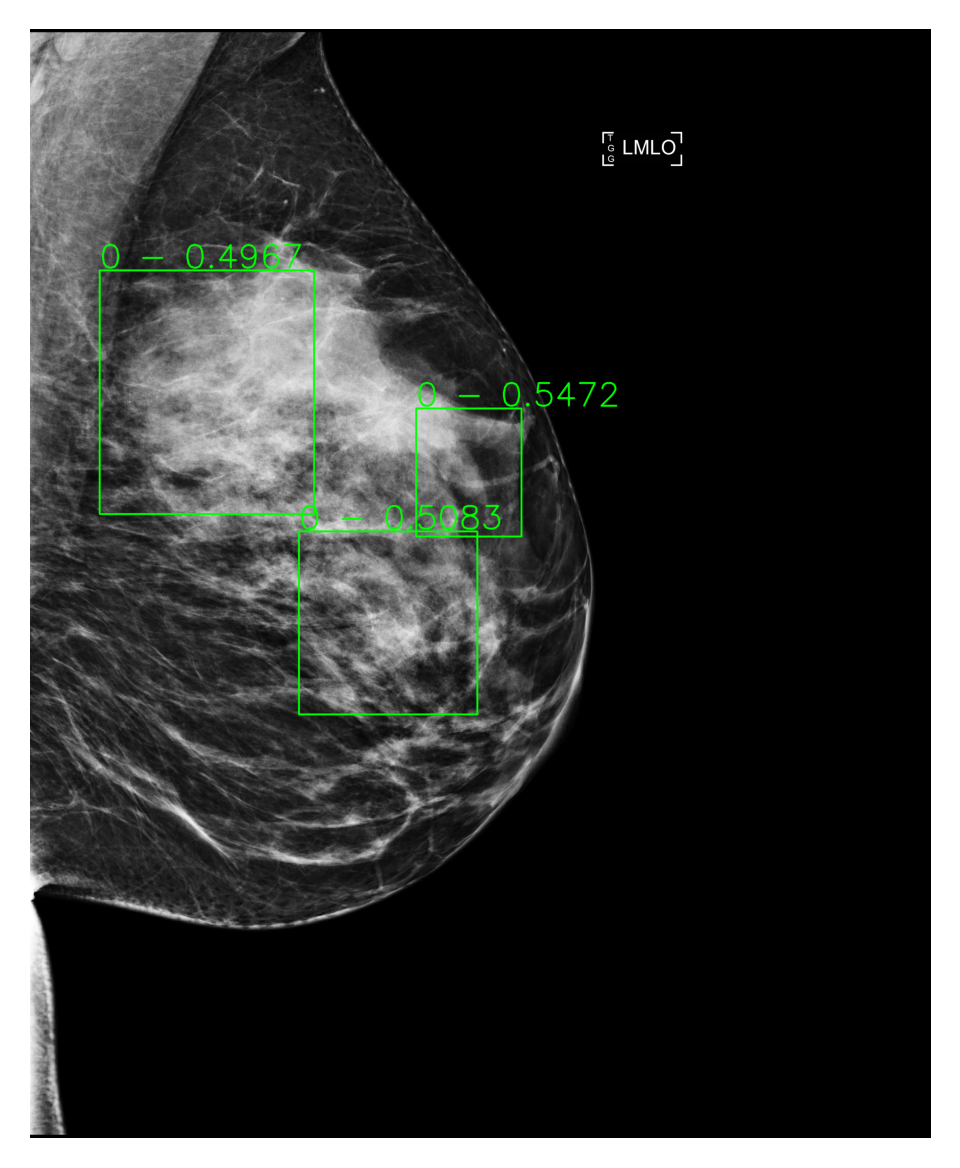

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# 设置路径
csv_path = r"E:\ISICDM2025\512-infer-result-postprocess2.csv"
image_dir = r"E:\ISICDM2025\ISICDM2025_images_for_test"
image_name = "ISICDM2025_test_001.png"

# 读取预测结果
df = pd.read_csv(csv_path)

# 筛选当前图像的预测
preds = df[df['image_name'] == image_name]

# 读取图像（注意：OpenCV 读取为 BGR）
img_path = Path(image_dir) / image_name
img_bgr = cv2.imread(str(img_path))

# 转为 RGB（matplotlib 使用 RGB）
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 定义字体、大小、颜色和粗细
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 4
text_thickness = 5
rectangle_thickness = 5  # 边界框厚度

# 定义颜色映射表
label_colors = {
    '0': (0, 255, 0),
    '2': (255, 0, 0),
    '3': (0, 0, 255),
}

# 在图像上绘制 bbox 和类别信息
for _, row in preds.iterrows():
    xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    print(xmin, ymin, xmax, ymax)
    label = str(row['predicted_class'])
    confidence = row['confidence']
    
    if label in label_colors:
        text_color = label_colors[label]
    else:
        text_color = (0, 255, 0) 
    
    label_with_confidence = f"{label} - {confidence:.4f}"
    
    # 绘制矩形
    cv2.rectangle(img_rgb, (xmin, ymin), (xmax, ymax), text_color, rectangle_thickness)
    
    # 添加类别和置信度文本
    cv2.putText(
        img_rgb,
        label_with_confidence,
        (xmin, ymin - 10),
        font,
        font_scale,
        text_color,
        text_thickness,
        cv2.LINE_AA
    )

# 使用 matplotlib 显示
plt.figure(dpi=300)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()

# Display multi image

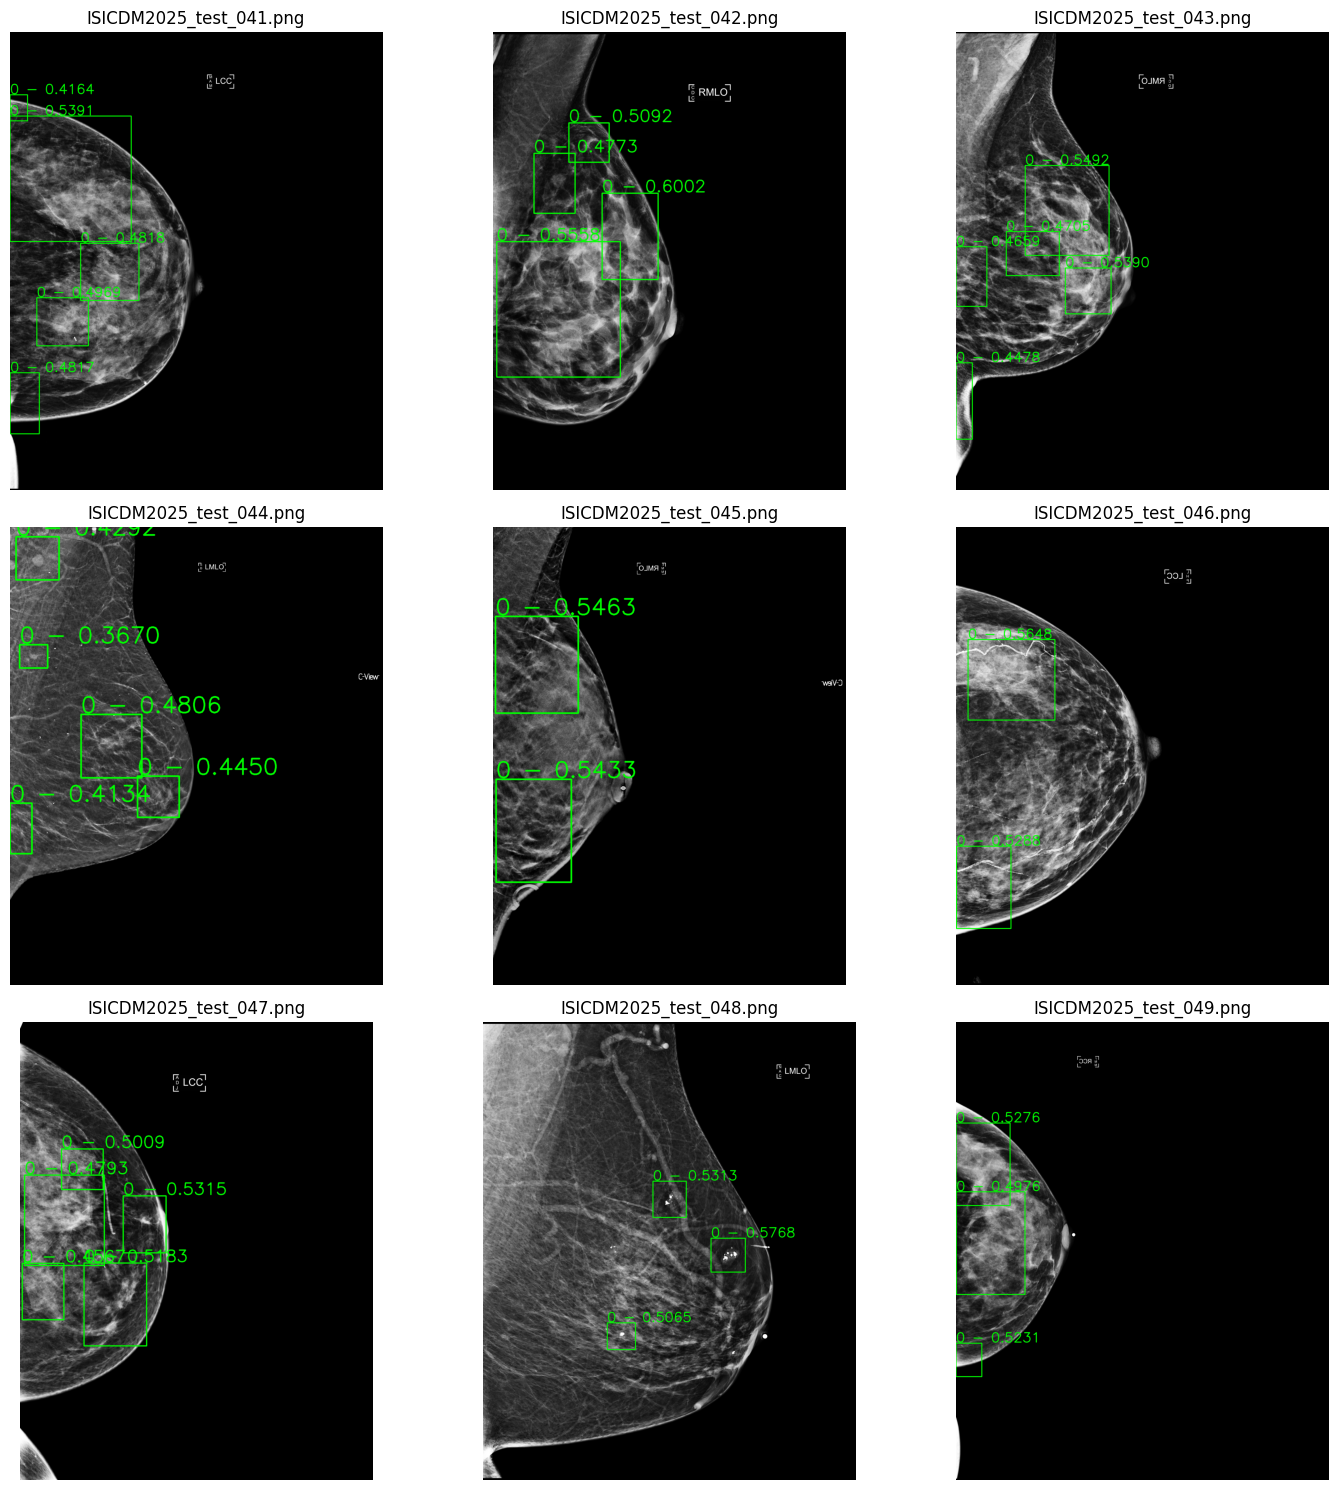

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# 设置路径
csv_path = r"E:\ISICDM2025\512-infer-result-postprocess2.csv"
image_dir = r"E:\ISICDM2025\ISICDM2025_images_for_test"


df = pd.read_csv(csv_path)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 4
text_thickness = 8
rectangle_thickness = 8

label_colors = {
    '0': (0, 255, 0),
    '1': (255, 165, 0),
    '2': (255, 0, 0),
    '3': (0, 0, 255),
    '4': (255, 0, 255),
    '5': (0, 255, 255),
    '6': (128, 0, 128),}

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i in range(9):
    image_name = f"ISICDM2025_test_{i+41:03d}.png"
    preds = df[df['image_name'] == image_name]
    img_path = Path(image_dir) / image_name
    img_bgr = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    for _, row in preds.iterrows():
        xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = str(row['predicted_class'])
        confidence = row['confidence']
        
        if label in label_colors:
            text_color = label_colors[label]
        else:
            text_color = (0, 255, 0) 
        
        label_with_confidence = f"{label} - {confidence:.4f}"
        
        cv2.rectangle(img_rgb, (xmin, ymin), (xmax, ymax), text_color, rectangle_thickness)
        cv2.putText(
            img_rgb,
            label_with_confidence,
            (xmin, ymin - 10),
            font,
            font_scale,
            text_color,
            text_thickness,
            cv2.LINE_AA
        )

    ax = axes[i]
    ax.imshow(img_rgb)
    ax.set_title(image_name)
    ax.axis('off')

plt.tight_layout()